In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [11]:
monthly_sales_of_company = pd.read_csv("C:/DS/Netology/TS/Series/monthly-sales-of-company-x-jan-6.csv")

In [13]:
monthly_sales_of_company.sample(5)

,Month,Count
64,1970-05,189
21,1966-10,347
50,1969-03,300
15,1966-04,79
33,1967-10,460


In [14]:
boston_robberies = pd.read_csv("C:/DS/Netology/TS/Series/monthly-boston-armed-robberies-j.csv")

In [16]:
boston_robberies.sample(5)

,Month,Count
6,1966-07,44
32,1968-09,120
44,1969-09,110
17,1967-06,47
65,1971-06,155


In [17]:
airlines_passengers = pd.read_csv("C:/DS/Netology/TS/Series/international-airline-passengers.csv")

In [18]:
airlines_passengers.sample(5)

,Month,Count
8,1949-09,136
39,1952-04,181
132,1960-01,417
62,1954-03,235
131,1959-12,405


In [19]:
monthly_temperature = pd.read_csv("C:/DS/Netology/TS/Series/mean-monthly-air-temperature-deg.csv")

In [20]:
monthly_temperature.sample(5)

,Month,Deg
226,1938-11,47.8
235,1939-08,61.8
112,1929-05,53.1
192,1936-01,37.3
81,1926-10,46.7


In [21]:
dowjones = pd.read_csv("C:/DS/Netology/TS/Series/weekly-closings-of-the-dowjones-.csv")

In [22]:
dowjones.sample(5)

,Week,Close
142,1974-W13,878.13
154,1974-W25,843.09
71,1972-W46,995.26
126,1973-W49,822.25
17,1971-W44,839.00


In [23]:
female_births = pd.read_csv("C:/DS/Netology/TS/Series/daily-total-female-births-in-cal.csv")

In [24]:
female_births.sample(5)

,Date,Count
314,1959-11-11,40
303,1959-10-31,46
190,1959-07-10,41
85,1959-03-27,56
363,1959-12-30,55


In [25]:
def adfuller_show(y):
    dft = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dft[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dft[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

def acdf(y):
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        ts_ax.set_title('Original')
        pd.Series(y).plot(ax=ts_ax, color='blue', label='Or')
        smt.graphics.plot_acf(y, lags=None, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=None, ax=pacf_ax, alpha=0.05)

    plt.tight_layout()

def show_result(y):
    adfuller_show(y)
    acdf(y)

# 1. Monthly sales of company X

Проверим первичиный ряд на стационарность тестом Дикки-Фуллера

Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\DS\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


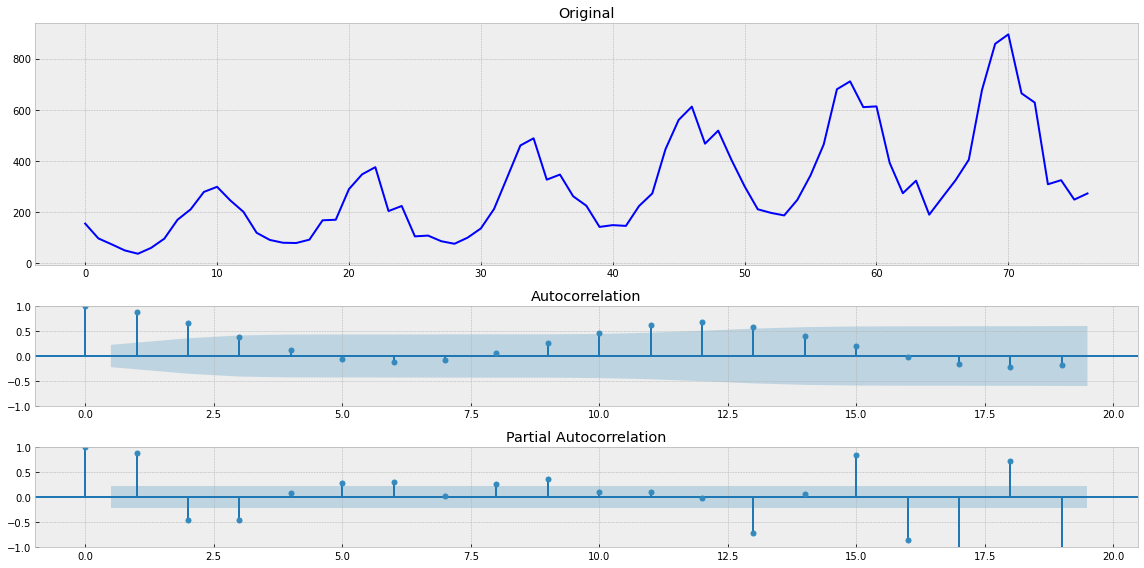

In [28]:
x = [i for i in range(len(monthly_sales_of_company['Count']))]
y = monthly_sales_of_company['Count']
show_result(y)

Ряд "Monthly sales of company X" - нестационарный. Это видно на графике и p-value=0.988889.

Применим метод Бокса-Коксаи выравнием дисперсию.

Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\DS\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


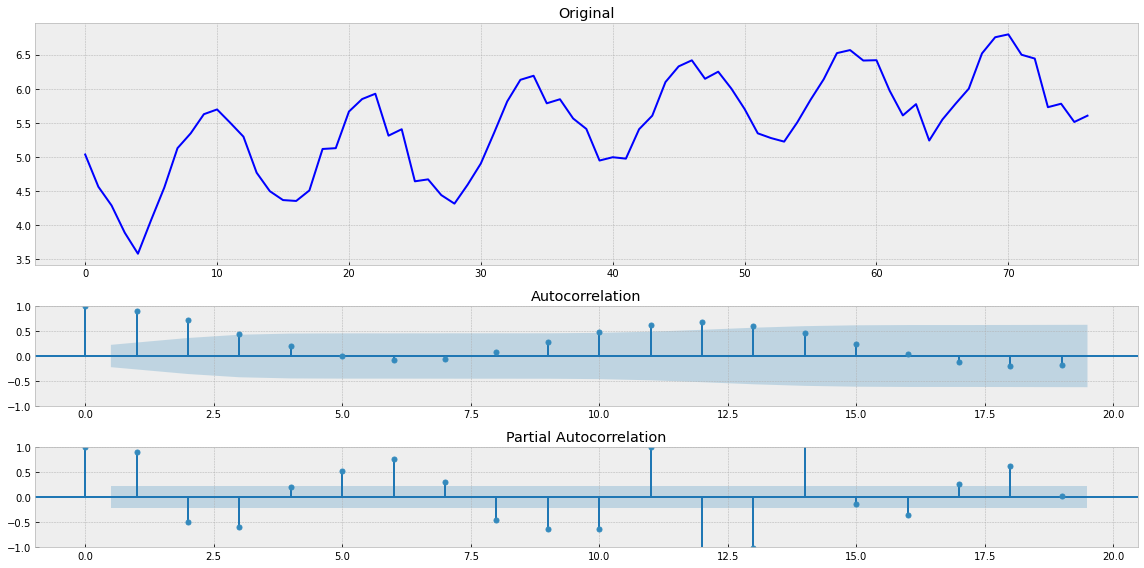

In [29]:
series =  boxcox(y, 0)
show_result(series)

Применим дифференцирование избавимся от тренда.

Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\DS\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


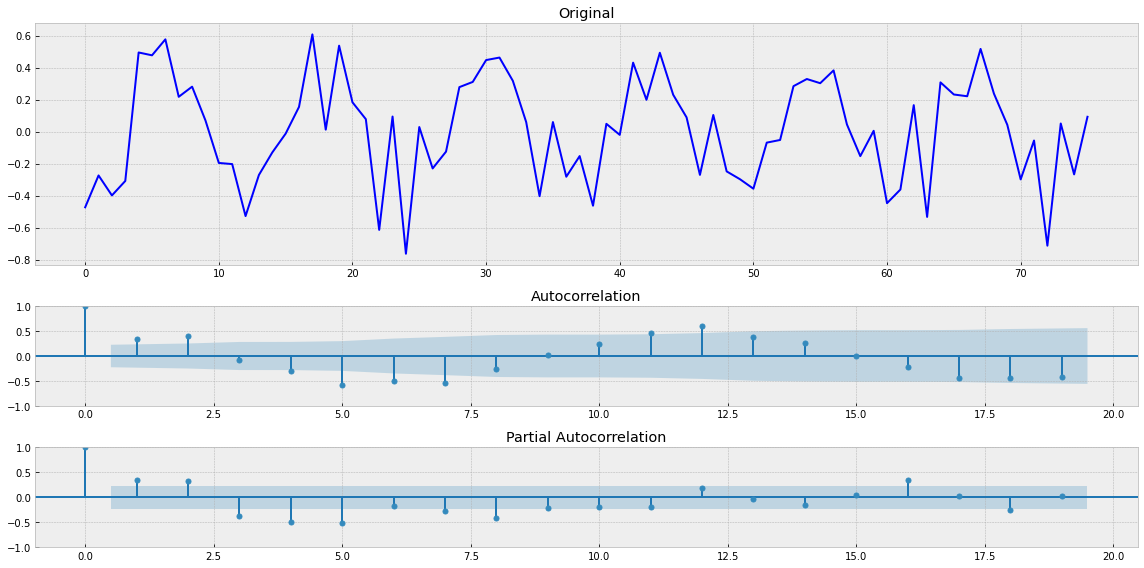

In [31]:
step = 1
series1 = np.diff(series, step)
show_result(series1)

Теперь ряд получился стационарным.

# 2. Boston robberies

Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


C:\DS\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


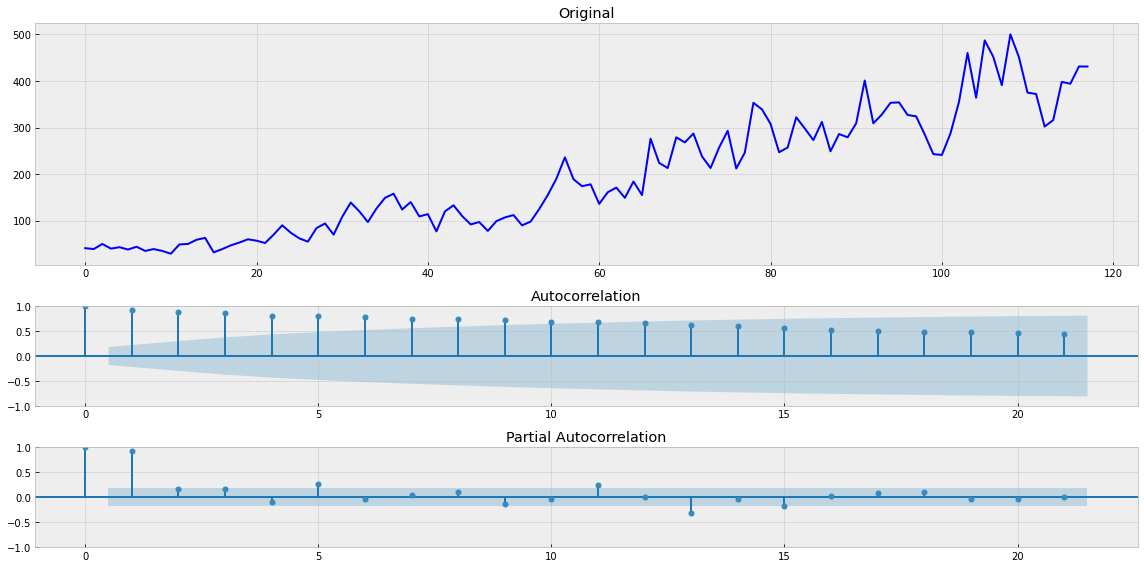

In [32]:
x = [i for i in range(len(boston_robberies['Count']))]
y = boston_robberies['Count']
show_result(y)

Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


C:\DS\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


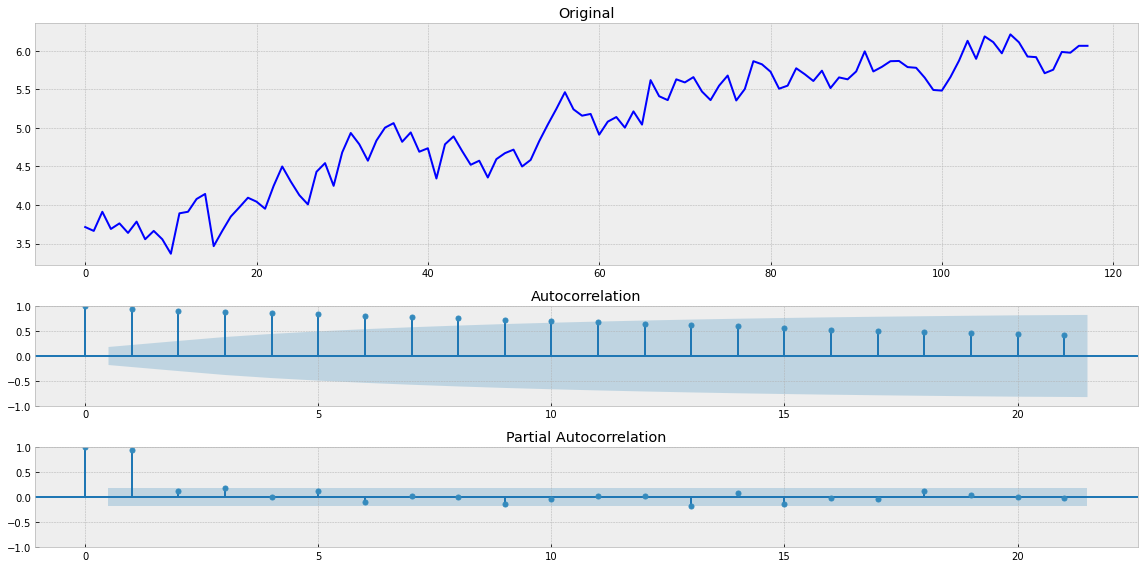

In [33]:
series =  boxcox(y, 0)
show_result(series)

Прослеживается тренд. Применим дифферинцирование и избавимся от него.

Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


C:\DS\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


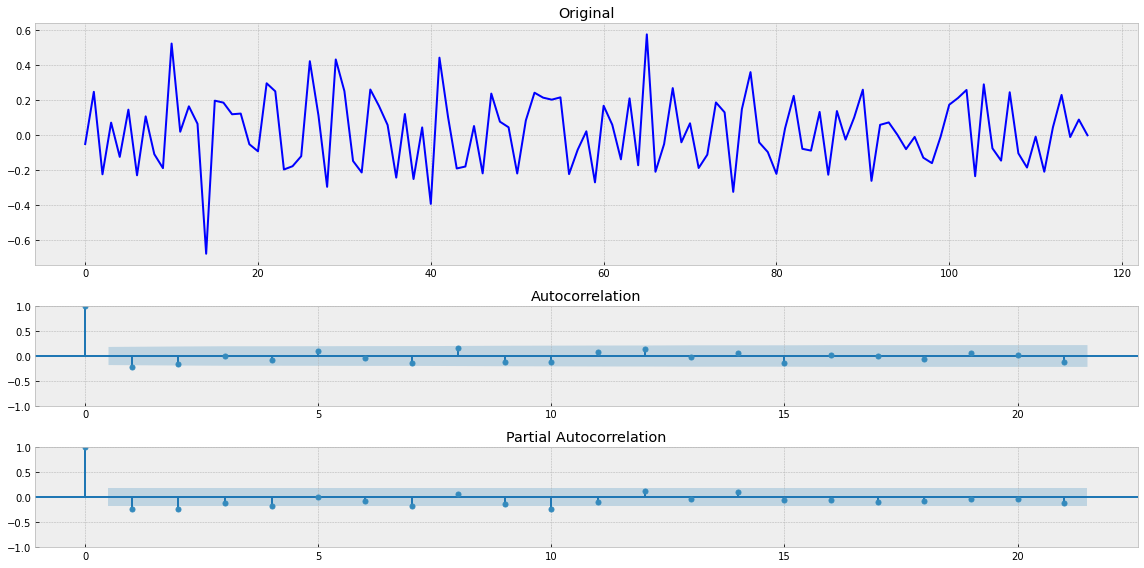

In [34]:
step = 1
series1 = np.diff(series, step)
show_result(series1)

По всем признакам ряд выглядит стационарным.

# 3. Airlines passengers

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


C:\DS\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


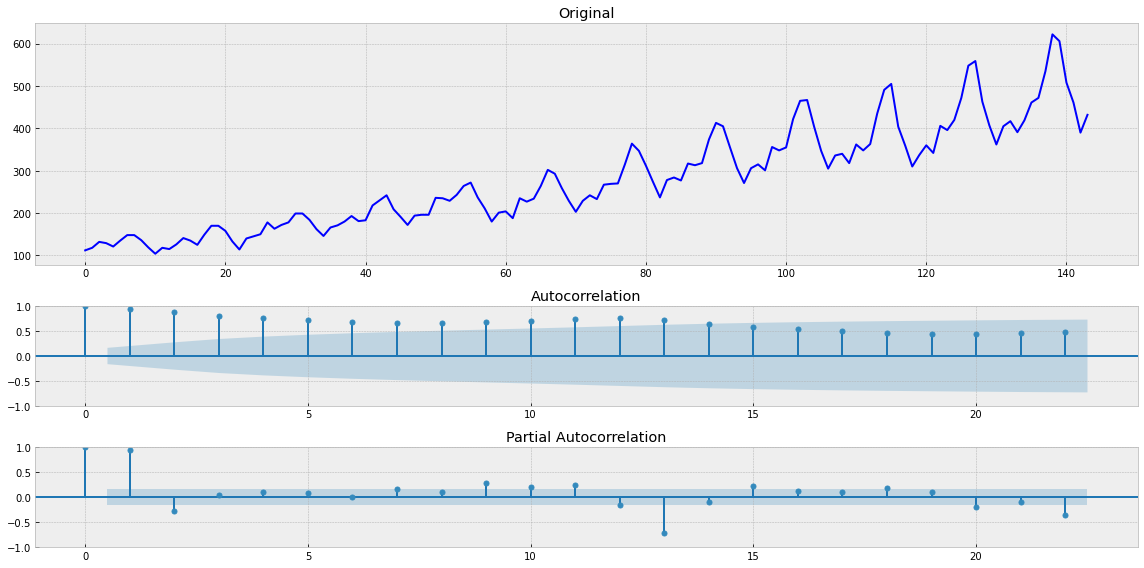

In [35]:
x = [i for i in range(len(airlines_passengers['Count']))]
y = airlines_passengers['Count']
show_result(y)

Есть и тренд и сезонность. Уберем изменение дисперсии при помощи преобразования Бокса-Кокса.

Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


C:\DS\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


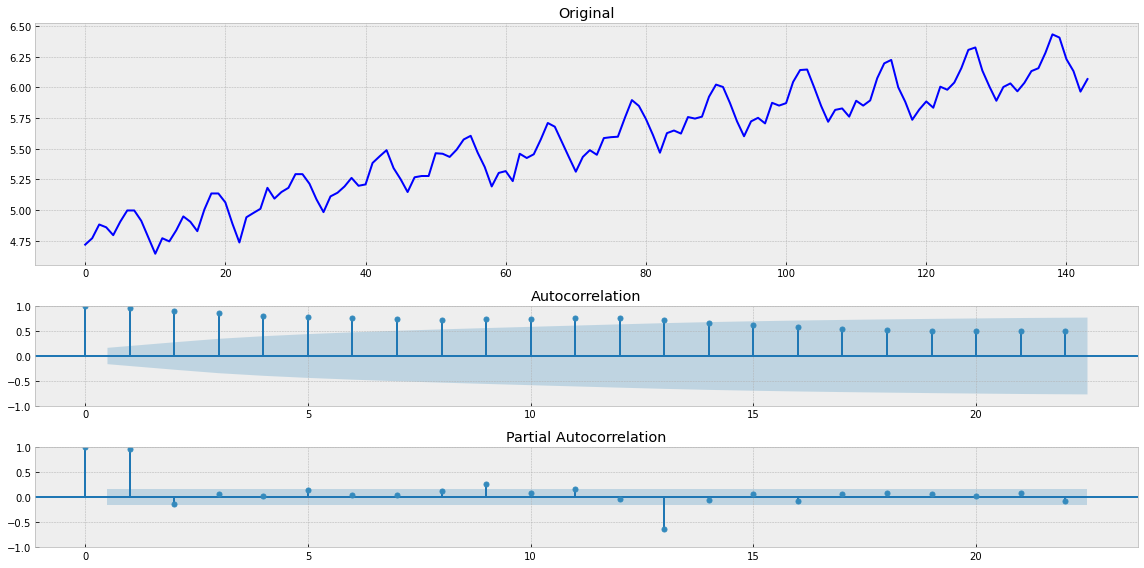

In [36]:
series =  boxcox(y, 0)
show_result(series)

Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


C:\DS\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


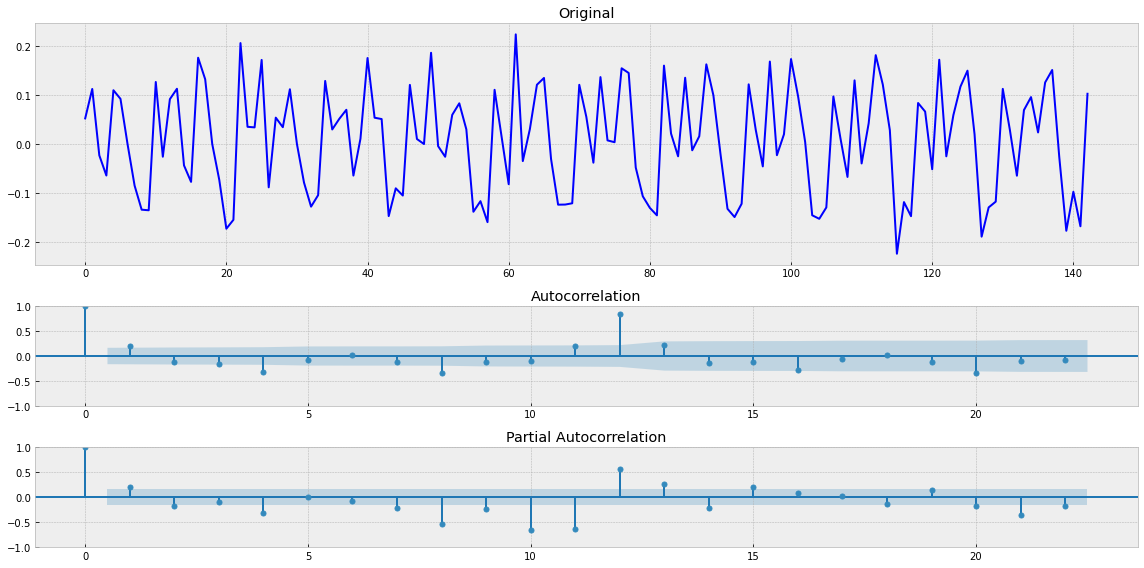

In [37]:
step = 1
series1 = np.diff(series, step)
show_result(series1)

Теперь ряд стационарный.

# 4. Monthly temperature

Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


C:\DS\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


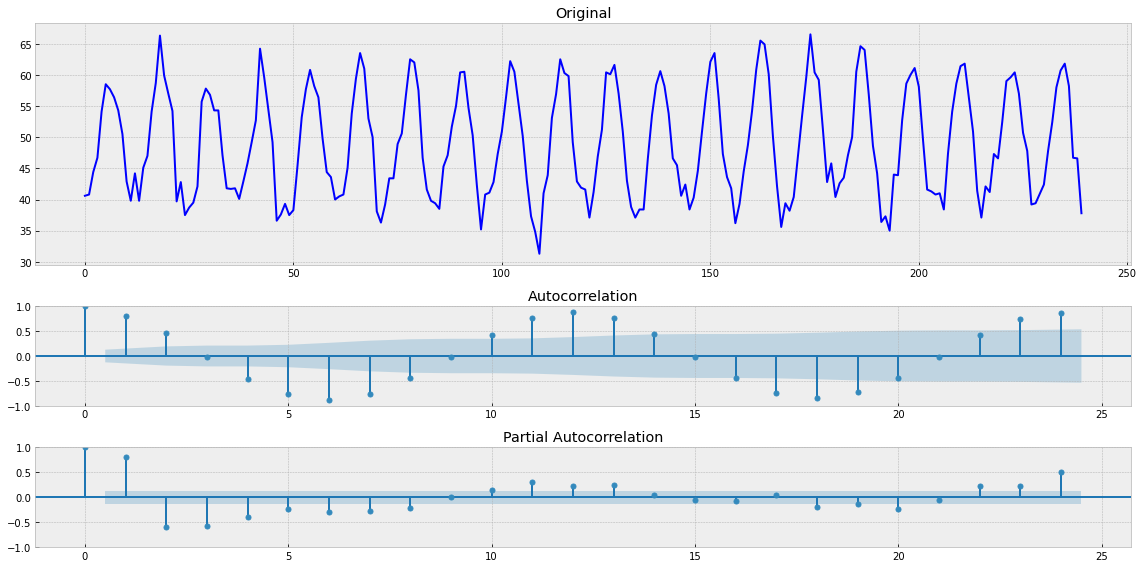

In [38]:
x = [i for i in range(len(monthly_temperature['Deg']))]
y = monthly_temperature['Deg']
show_result(y)

Имеется сезонность. Уберём её, используя дифференцирование.

Test Statistic                -1.225927e+01
p-value                        9.157883e-23
#Lags Used                     1.100000e+01
Number of Observations Used    2.270000e+02
Critical Value (1%)           -3.459490e+00
Critical Value (5%)           -2.874358e+00
Critical Value (10%)          -2.573602e+00
dtype: float64


C:\DS\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


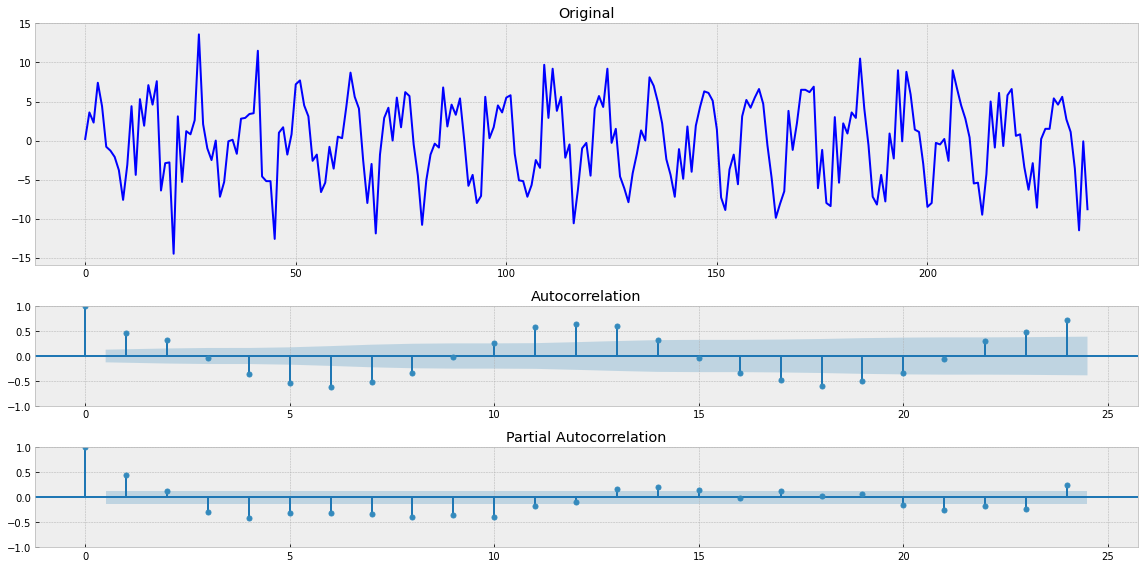

In [39]:
step = 1
series1 = np.diff(y, step)
show_result(series1)

Ряд стал стационарным

# 5. Dowjones

Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


C:\DS\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


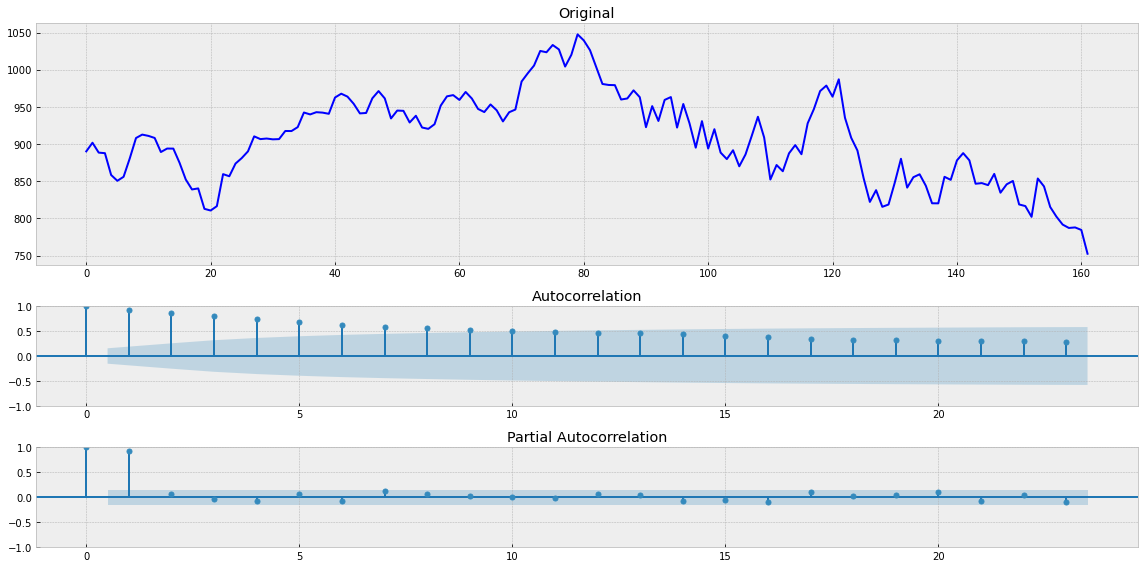

In [40]:
x = [i for i in range(len(dowjones['Close']))]
y = dowjones['Close']
show_result(y)

Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


C:\DS\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


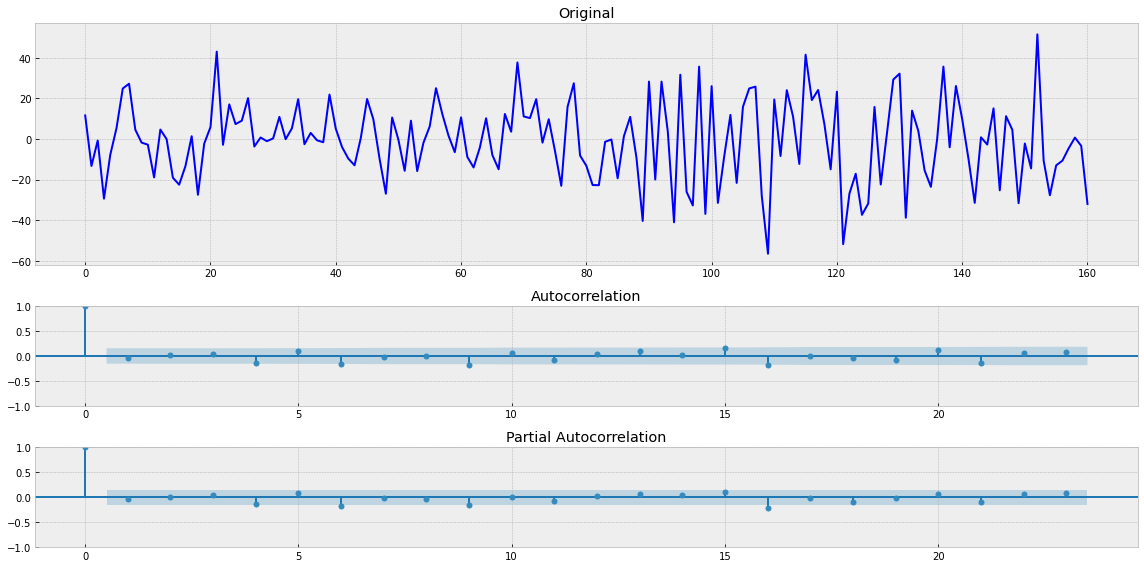

In [41]:
step = 1
series1 = np.diff(y, step)
show_result(series1)

Ряд стал стационарным

# 6. Ffemale births

Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


C:\DS\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


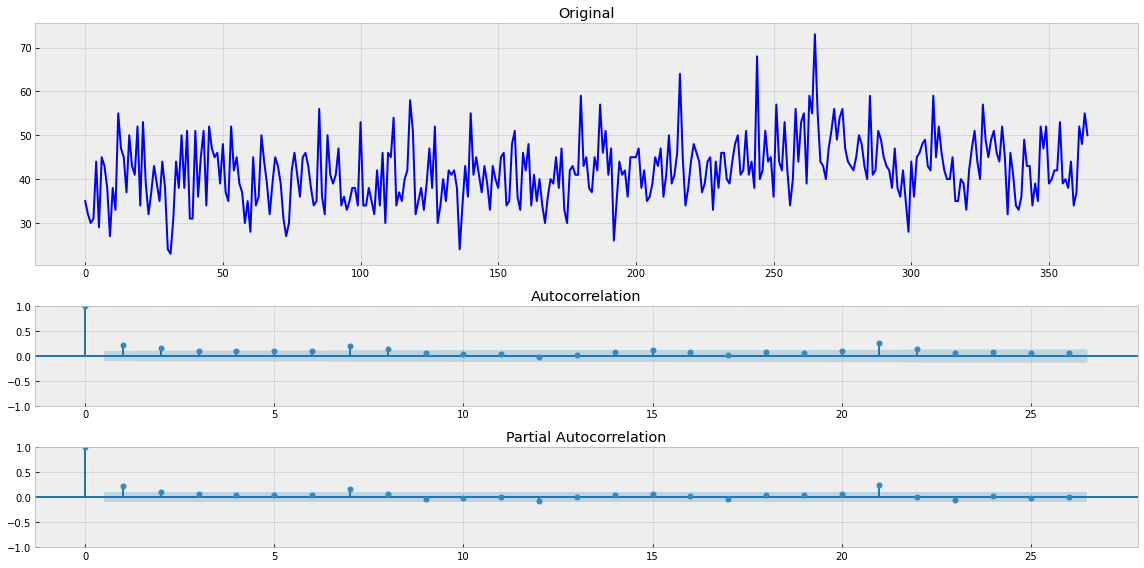

In [42]:
x = [i for i in range(len(female_births['Count']))]
y = female_births['Count']
show_result(y)

Test Statistic                -1.262518e+01
p-value                        1.547240e-23
#Lags Used                     6.000000e+00
Number of Observations Used    3.570000e+02
Critical Value (1%)           -3.448801e+00
Critical Value (5%)           -2.869670e+00
Critical Value (10%)          -2.571101e+00
dtype: float64


C:\DS\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


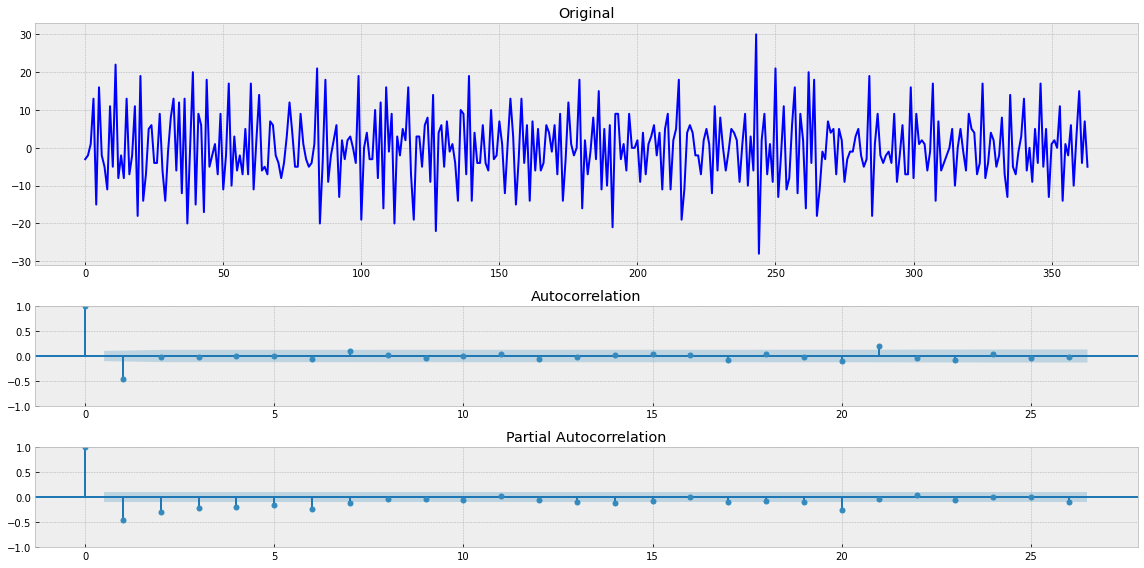

In [43]:
step = 1
series1 = np.diff(y, step)
show_result(series1)

Ряд стационарен